# Rotate Greenland

In [2]:
import sys
sys.path.insert(1, r'C:\Users\XPS\Documents\research\macrostrat\pygplates_0.36.0_py310_win64')
import pygplates
import shapefile
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import glob

## Proof of Concept

In [3]:
sf = shapefile.Reader('gis/Laurentia_buffered_margin/Greenland_Laurentia_0100km.shp')
sf = shapefile.Reader('gis/Laurentia_buffered_margin/greenland_extraction.shp')
coords = sf.shapes()[0].points

gl = pygplates.PolygonOnSphere([(lat, lon) for lon, lat in coords])
gl_coords = gl.to_lat_lon_array()

In [4]:
pole = (67.5, -118.48)
rot = 14*np.pi/180
fr = pygplates.FiniteRotation(pole, rot)
gl_rot = fr * gl

In [5]:
gl_rot_coords = gl_rot.to_lat_lon_array()

C:\Users\XPS\miniconda3\envs\macrostrat\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


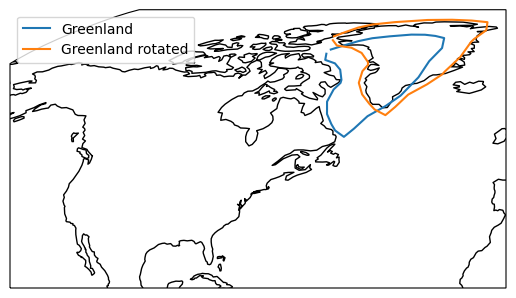

In [6]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.Robinson())

ax.coastlines()
ax.plot(gl_coords[:, 1], gl_coords[:, 0], transform=ccrs.Geodetic(), label='Greenland')
ax.plot(gl_rot_coords[:, 1], gl_rot_coords[:, 0], transform=ccrs.Geodetic(), label='Greenland rotated')
# ax.set_ylim([30, 90])
# ax.set_xlim([-140, -10])
ax.set_extent([-130, -10, 20, 90], crs=ccrs.Geodetic())
ax.legend()

plt.show()

## Rotate buffered polygons

In [19]:
pole = (67.5, -118.48)
rot = 14*np.pi/180
fr = pygplates.FiniteRotation(pole, rot)

sfs = glob.glob('gis/Laurentia_buffered_margin_new/*clipped.shp')

for sf_file in sfs:
    sf = shapefile.Reader(sf_file)
    if len(sf) == 0:
        continue
    coords = sf.shapes()[0].points
    gl = pygplates.PolygonOnSphere([(lat, lon) for lon, lat in coords])
    gl_rot = fr * gl
    gl_rot_coords = gl_rot.to_lat_lon_list()
    # make into lon lat list
    gl_rot_coords = [[lon, lat] for lat, lon in gl_rot_coords]
    sf_out = shapefile.Writer(sf_file.split('.')[0] + '_rot.shp')
    sf_out.field('name', 'C')
    sf_out.poly([gl_rot_coords])
    sf_out.record('polygon1')
    sf_out.close()